In [310]:
from cl_model import Cl_distribution
import networkx as nx
import matplotlib.pyplot as plt
import queue
import random
import numpy as np

In [322]:
n = 20
m = 100

<function matplotlib.pyplot.show(*args, **kw)>

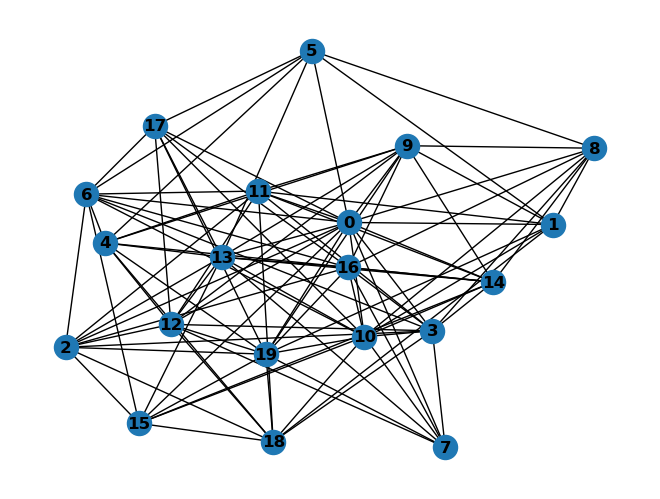

In [323]:
rg = nx.gnm_random_graph(n, m)
nx.draw(rg, with_labels=True, font_weight='bold')
plt.show

In [332]:
# print degree sequence
degree_sequence = list(d for n, d in rg.degree())
print(degree_sequence)
rg.number_of_edges()

[16, 8, 10, 11, 9, 7, 10, 7, 8, 10, 13, 10, 11, 12, 10, 8, 11, 8, 9, 12]


100

In [325]:
cl_helper = Cl_distribution(degree_sequence)
iter = 0
G = nx.Graph()
for i in range (0,n):
    G.add_node(i)
while G.number_of_edges() < m and iter<10000:
    id1 = cl_helper.rvs()
    if G.degree(id1)<degree_sequence[id1]:
        id2 = cl_helper.rvs()
        #while id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            #id2 = cl_helper.rvs()
        if id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            continue
        else:
            G.add_edge(id1,id2)
    iter+=1

99

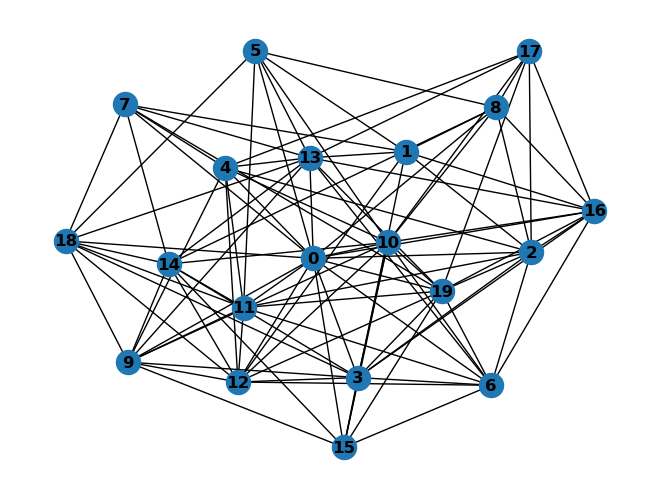

In [326]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show
G.number_of_edges()

In [304]:
# pseudo-clustering coefficient
## choose a node at random, choose two of its neighbors at random, and check if they are connected.

def average_clustering(G, trials=1000):
    triangles = 0
    nodes = G.nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        # neighbors of i
        nbrs = list(G.adj[i])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in G[v]:
            triangles +=1
    return triangles / float(trials)

In [307]:
moy = 0
for i in range (0,10):
    moy+=average_clustering(rg)
moy/10

0.1165

In [308]:
moy = 0
for i in range (0,10):
    moy+=average_clustering(G)
moy/10

0.09379999999999998

Ajouter des bruits selon laplace distribution

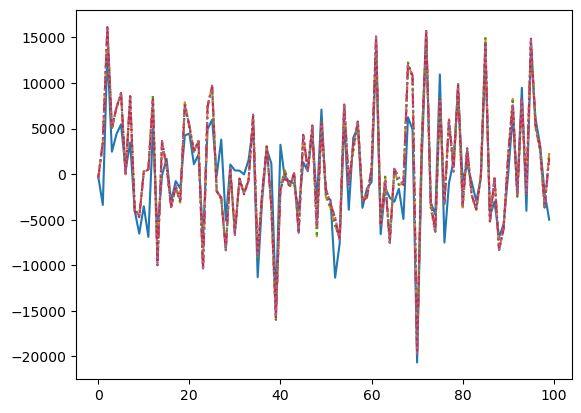

In [321]:
import matplotlib.pyplot as plt
l = len(degree_sequence)
x = list(range(l))
mean = 0
scale = 1
size = len(degree_sequence)
plt.plot(x,degree_sequence)

for epsilon in [0.001,0.01,0.1]:
    scale = 2/epsilon
    random_variables = np.random.laplace(mean, scale, size)
    d_laplace = degree_sequence
    for i in range (0,len(degree_sequence)):
        d_laplace[i]=degree_sequence[i]+random_variables[i]
    if epsilon == 0.001:
        plt.plot(x,d_laplace,linestyle='--')
    if epsilon == 0.01:
        plt.plot(x,d_laplace,linestyle='-.')
    else:
        plt.plot(x,d_laplace,linestyle=':')

plt.show()


In [342]:
# sort degree sequence
degree_sequence_increasing = degree_sequence
degree_sequence_increasing.sort()

epsilon = 0.1
mean = 0
scale = 2/epsilon
size = len(degree_sequence)
random_variables = np.random.laplace(mean, scale, size)
degree_sequence_noisy = degree_sequence_increasing + random_variables

m_k = [0]*size
for i in range (0,size):
    m_k[i]=

19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
